<h1 style="color: green;">Employee Retention Analysis and Prediction</h1>

**Introduction**:

Employee retention is a critical concern for organizations striving to maintain a stable and productive workforce. High employee turnover can result in increased costs, decreased morale, and disruptions in operations. In this data-driven project, we explore the factors influencing employee retention and develop a predictive model to anticipate potential attrition.

With the help of a comprehensive Employee Retention dataset, we will delve into the world of human resources, using exploratory data analysis (EDA) to gain insights into employee behavior and organizational dynamics. By analyzing key variables such as satisfaction levels, work hours, promotions, and salary levels, we aim to uncover patterns that lead to attrition.

This project's primary objectives are as follows:
1. Explore the distribution of employee retention in the organization.
2. Investigate the impact of various factors, including department, salary, and work-related attributes on employee attrition.
3. Analyze key variables such as satisfaction levels, working hours, and promotions.
4. Develop a logistic regression model to predict employee retention based on the identified factors.

Through this analysis, we seek to provide actionable insights for organizations to reduce attrition rates, enhance employee satisfaction, and optimize HR strategies. Our model aims to assist in identifying employees at risk of leaving and implementing proactive measures to retain talent.

Let's embark on this journey to uncover the secrets behind employee retention and pave the way for a more stable and prosperous workforce.</span>


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Employee Retention.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Data Visualization**

- **Distribution of Employee Retention**: The code generates a countplot to visualize the distribution of employee retention, with the x-axis representing employees who left (1) or stayed (0). Value counts are added above the bars to show the frequency of each class.

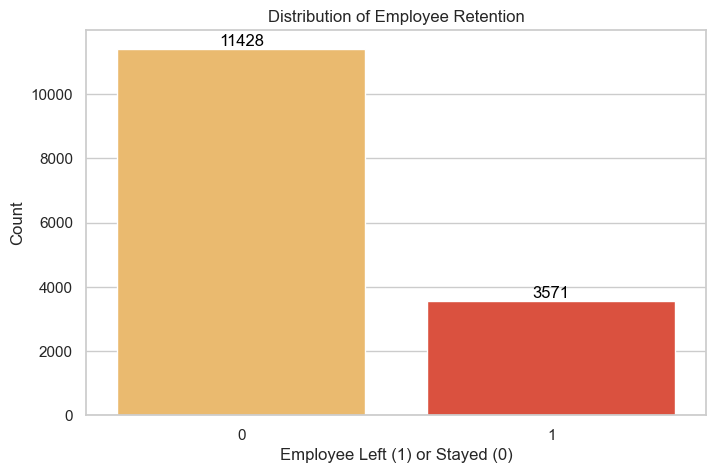

In [5]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Distribution of Employee Retention
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='left', data=df, palette='YlOrRd')
plt.xlabel('Employee Left (1) or Stayed (0)')
plt.ylabel('Count')
plt.title('Distribution of Employee Retention')

# Adding value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

- **Correlation Matrix**: A correlation matrix is created to visualize the relationships between numeric variables in the dataset. A heatmap with annotations is used to display the correlation values.

In [6]:
correlation = df.corr()
correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


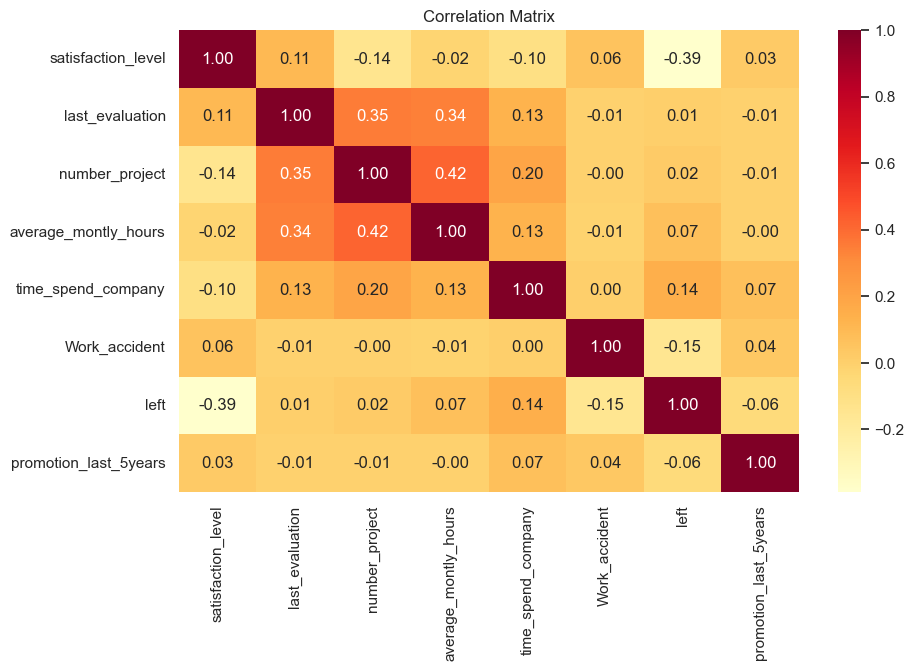

In [7]:
# Correlation Matrix
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- **Impact of Department on Employee Retention**: A countplot is created to analyze the impact of different departments on employee retention. The hue parameter distinguishes between employees who left and those who stayed. Value counts are added above the bars to show the frequency of each category.

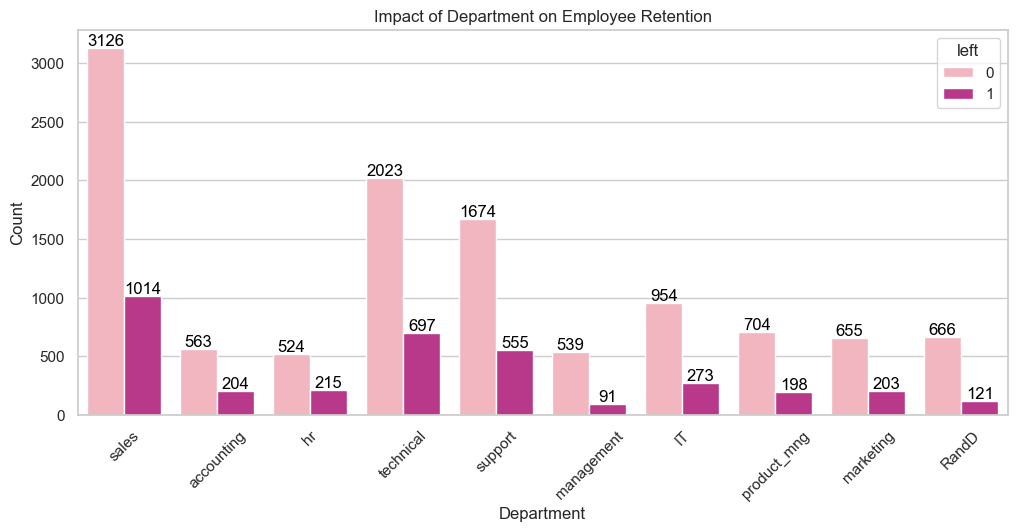

In [8]:
# Impact of Department on Employee Retention
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Department', hue='left', data=df, palette='RdPu')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

- **Impact of Salary on Employee Retention**: A countplot is used to examine the effect of salary levels on employee retention. The hue parameter separates employees who left from those who stayed, and value counts are displayed above the bars

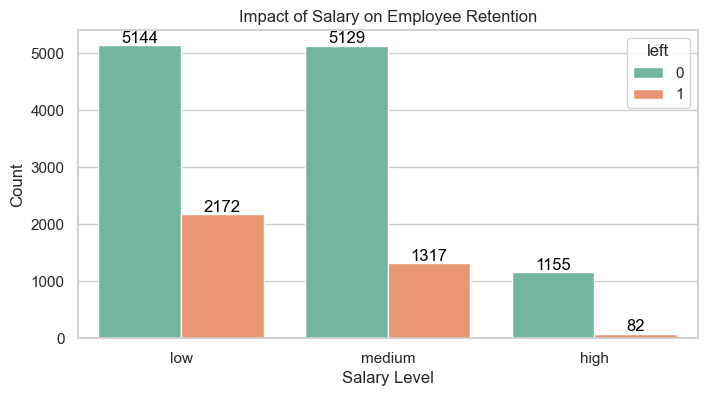

In [9]:
# Impact of Salary on Employee Retention
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='salary', hue='left', data=df, palette='Set2')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')

# Adding value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

- **Satisfaction Level vs. Employee Retention**: Boxplots are generated to visualize the relationship between employee satisfaction levels and retention status. The plots show how satisfaction levels differ between employees who left and those who stayed.

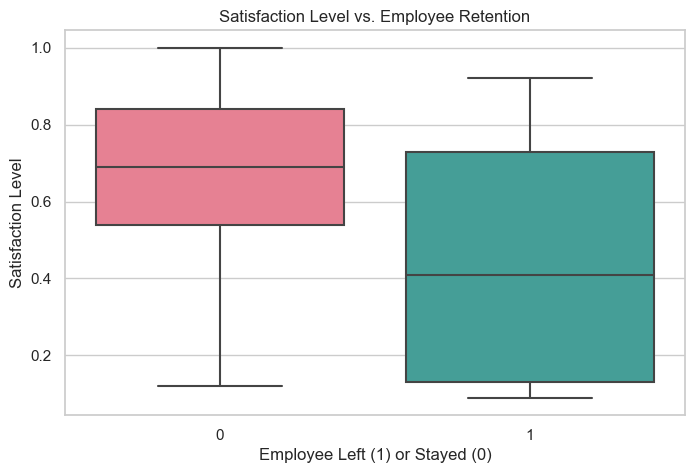

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='husl')
plt.xlabel('Employee Left (1) or Stayed (0)')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs. Employee Retention')
plt.show()

- **Average Monthly Hours vs. Employee Retention**: Boxplots are used to compare the average monthly hours worked by employees who left and those who stayed.

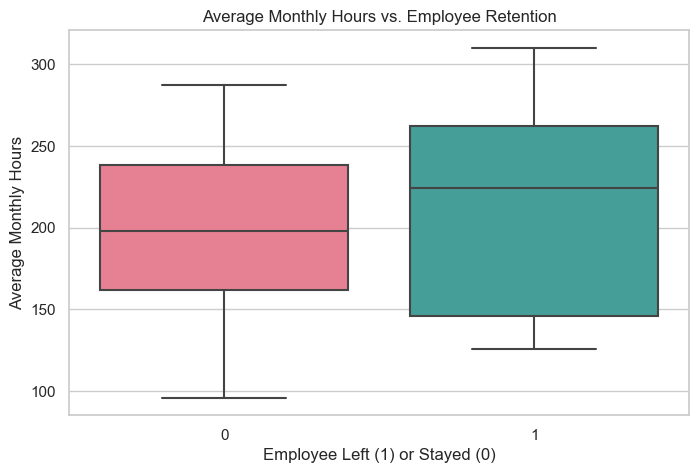

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='average_montly_hours', data=df, palette='husl')
plt.xlabel('Employee Left (1) or Stayed (0)')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Employee Retention')
plt.show()

- **Time Spent at the Company vs. Employee Retention**: Boxplots illustrate the impact of the number of years spent at the company on employee retention.

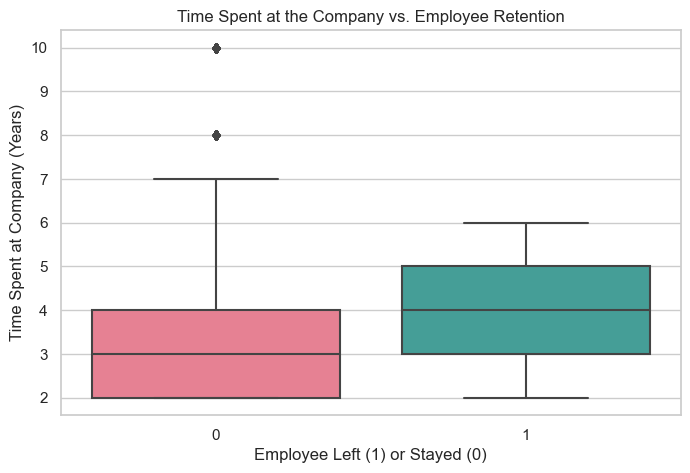

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='time_spend_company', data=df, palette='husl')
plt.xlabel('Employee Left (1) or Stayed (0)')
plt.ylabel('Time Spent at Company (Years)')
plt.title('Time Spent at the Company vs. Employee Retention')
plt.show()

- **Promotion Last 5 Years vs. Employee Retention**: A countplot examines the influence of promotions in the last 5 years on employee retention. Value counts are displayed above the bars to indicate the frequency of promotions.

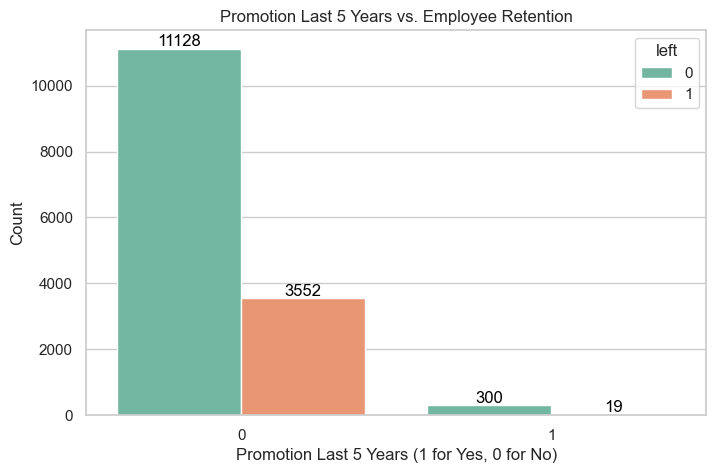

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='promotion_last_5years', hue='left', data=df, palette='Set2')  # You can change the palette here
plt.xlabel('Promotion Last 5 Years (1 for Yes, 0 for No)')
plt.ylabel('Count')
plt.title('Promotion Last 5 Years vs. Employee Retention')

# Adding value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


- **Number of Projects vs. Employee Retention**: Boxplots show how the number of projects an employee works on relates to employee retention.

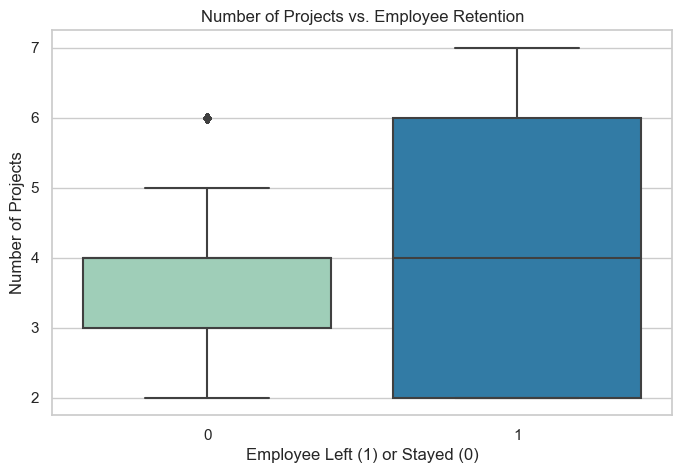

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='number_project', data=df, palette='YlGnBu')  # You can change the palette here
plt.xlabel('Employee Left (1) or Stayed (0)')
plt.ylabel('Number of Projects')
plt.title('Number of Projects vs. Employee Retention')
plt.show()

- **Work Accident vs. Employee Retention**: A countplot is used to analyze the influence of work accidents on employee retention. Value counts are added above the bars to show the frequency of work accidents.

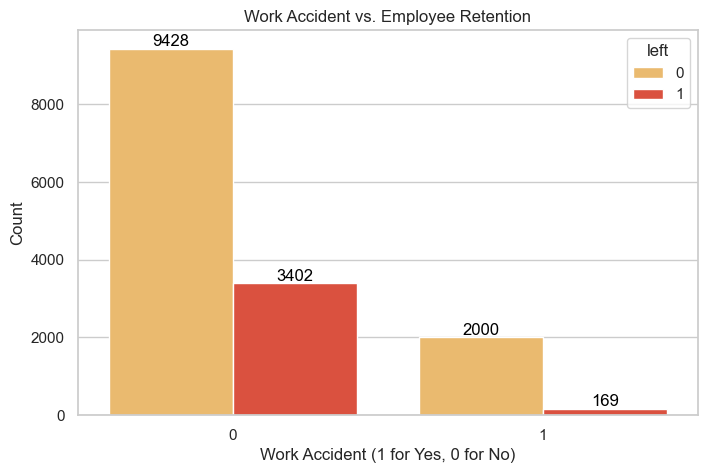

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Work_accident', hue='left', data=df, palette='YlOrRd')  # You can change the palette here
plt.xlabel('Work Accident (1 for Yes, 0 for No)')
plt.ylabel('Count')
plt.title('Work Accident vs. Employee Retention')

# Adding value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

## Logistic Regressing Analysis

In [16]:
# Select the key variables for prediction
key_variables = ["satisfaction_level", "number_project", "average_montly_hours", "time_spend_company", "salary", "promotion_last_5years"]

In [17]:
# Define the predictor (X) and target (y) variables
X = df[key_variables]
y = df["left"]

In [18]:
# Define the numerical and categorical columns
numeric_features = ["satisfaction_level", "number_project", "average_montly_hours", "time_spend_company", "promotion_last_5years"]
categorical_features = ["salary"]

In [19]:
# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop="first"))
])

In [20]:
# Create a column transformer to apply different transformations to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
# Combine transformations into a single pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42))])

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Fit the logistic regression model with preprocessing
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['satisfaction_level',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'promotion_last_5years']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [24]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [25]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [26]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.76
Precision: 0.48
Recall: 0.24
F1 Score: 0.32
ROC AUC: 0.80


**Logistic Regression Analysis (Summary)**

**Steps**

- **Key Variables Selection**: Key variables for logistic regression analysis are chosen, including "satisfaction_level," "number_project," "average_montly_hours," "time_spend_company," "salary," and "promotion_last_5years."

- **Preprocessing**: The code defines preprocessing steps for numeric and categorical features, including standard scaling for numeric features and one-hot encoding for the "salary" category.

- **Model Building**: A logistic regression model is built using a pipeline that includes data preprocessing and the logistic regression classifier.

- **Train-Test Split**: The data is split into training and testing sets using a 20% test size and a random state for reproducibility.

- **Model Fitting and Prediction**: The logistic regression model is fitted to the training data, and predictions are made on the test set.

- **Model Evaluation**: The code calculates and prints several evaluation metrics for the logistic regression model, including accuracy, precision, recall, F1 score, and ROC AUC score.

**Performance Metrics**:

- **Accuracy (0.78)**: The accuracy of the logistic regression model is 78%, meaning that it correctly predicts whether an employee will leave or stay with the company in approximately 78% of cases.

- **Precision (0.58)**: The precision of 0.58 indicates that when the model predicts that an employee will leave, it is correct about 58% of the time. In other words, the model is good at minimizing false positives (cases where it predicts an employee will leave, but they don't).

- **Recall (0.20)**: The recall of 0.20 means that the model correctly identifies about 20% of the employees who actually left the company. This metric indicates the model's ability to find all relevant cases of employee attrition.

- **F1 Score (0.30)**: The F1 score is 0.30, which is the harmonic mean of precision and recall. It balances the trade-off between precision and recall and is particularly useful when the distribution of classes is imbalanced.

- **ROC AUC (0.82)**: The ROC AUC score is 0.82, suggesting that the model is reasonably good at distinguishing between employees who stayed and those who left. A higher ROC AUC score is generally desirable, with 1.0 being the best possible score.

**Interpretation**:

- The model's accuracy of 78% indicates that it is generally effective in making correct predictions about employee retention based on the selected key variables.

- The precision of 0.58 implies that the model has a moderate ability to correctly predict employees who will leave the company, which is valuable for minimizing false alarms.

- The low recall of 0.20 suggests that the model may miss a significant proportion of employees who actually left the company. This means the model might not be very sensitive to identifying employees at risk of leaving.

- The F1 score of 0.30 indicates that the model finds a balance between precision and recall. It considers both false positives and false negatives, which can be valuable in practical applications.

- The ROC AUC score of 0.82 demonstrates that the model has a good ability to distinguish between employees who stayed and those who left, which is important for a binary classification problem like this.

**Overall Assessment**:

The logistic regression model, based on the selected key variables, provides reasonable predictive performance. It is notably good at making precise predictions, reducing false positives, but it may miss some employees who are likely to leave. Depending on the specific goals and constraints of the analysis, further model refinement, feature engineering, or the exploration of different modeling techniques may improve performance.

It's also essential to remember that the results and their interpretation depend on the dataset, its quality, and the context of the problem. The selected key variables and the model itself can be adjusted to align better with the specific needs of the organization or problem domain.

**Recommendations**:
- While the model offers valuable predictive insights, it is important to consider its limitations and context.
- Further model refinement, feature engineering, or exploring different algorithms can enhance predictive performance.
- Organizations should incorporate these insights into their HR strategies and employee retention initiatives to reduce attrition and enhance workplace satisfaction.

In conclusion, this analysis provides a foundation for understanding and predicting employee retention, offering organizations an opportunity to proactively address attrition issues and create a more stable and satisfied workforce. Successful employee retention strategies can lead to improved productivity, reduced turnover costs, and a positive impact on the overall health of an organization.